In [1]:
from grid import *
from grid import Neuron
import grid
%matplotlib inline

In [2]:
N = 12
numrow = 6; numcol = 12;

rhos = 0.14 * (np.sqrt(3) ** np.arange(numrow))
thetas = np.pi + 2.0*np.pi*(np.arange(numcol))/numcol


VCOmatrix = [[vco.VCO_model(N, rhos[i], thetas[j]) for j in range(numcol)] for i in range(numrow)]

# border cell (Fig. 7)
weights_border = np.full([6,12],np.nan)
weights_border[:,9] = [2,3,5,7,11,9]

# large grid (Fig. 7)
weights_lgrid = np.full([6,12],np.nan)
weights_lgrid[3,0] = 9
weights_lgrid[3,4] = 9
weights_lgrid[3,8] = 3

# small grid (Fig. 7)
weights_sgrid = np.full([6,12],np.nan)
weights_sgrid[3,1] = 1
weights_sgrid[3,5] = 9
weights_sgrid[3,9] = 3

# place cell (Fig. 7)
weights_place = np.full([6,12],np.nan)
rot_place = 8*np.pi/6. #orientation of the tuning function is zero by default
weights_place[2,:] = [11,11,0,0,0,0,0,0,11,10,10,10]
weights_place[3,:] = [10,11,0,0,0,0,0,0,10,10,10,10]
weights_place[4,:] = [10,11,0,1,2,1,0,0,10, 9, 8, 9]

# curved border (Fig. 9)
weights_cborder = np.full([6,12],np.nan)
for col in [0,1,2,3,4,11]:
    weights_cborder[:,col] = [1,1,2,4,7,1]
    
#lumpy border (supplemental)
weights_lborder = np.full([6,12],np.nan)
weights_lborder[:,0] = [1,2,3,5,8,3]
weights_lborder[2,2] = 6
weights_lborder[3,2] = 1

# multi-field dentate place cell in square box (supplemental)
weights_dplace = np.full([6,12],np.nan)
weights_dplace[2,:] = [8,0,1,1,7,4,2,7,8,8,4,2]
weights_dplace[3,:] = [3,0,3,0,5,0,1,4,5,9,9,11]
weights_dplace[4,:] = [0,2,2,10,7,0,0,5,6,2,6,4]

In [3]:
border_cell = Neuron('border', VCOmatrix, 'hand', weights_border)
lgrid_cell = Neuron('lgrid', VCOmatrix, 'hand', weights_lgrid)
sgrid_cell = Neuron('sgrid', VCOmatrix, 'hand', weights_sgrid)
place_cell = Neuron('place', VCOmatrix, 'hand', weights_place)
cborder_cell = Neuron('cborder', VCOmatrix, 'hand', weights_cborder)
lborder_cell = Neuron('lborder', VCOmatrix, 'hand', weights_lborder)
dplace_cell = Neuron('dplace', VCOmatrix, 'hand', weights_dplace)

In [4]:
border_cell.get_inputs()

[VCO [N=12, (rho, theta)=(0.14, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.24248711305964282, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.42, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.7274613391789284, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(1.2599999999999998, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(2.182384017536785, 7.853982), phi_n=0]]

In [5]:
lgrid_cell

Neuron [lgridcell, input type = <class 'vco.VCO_model'>, number of inputs =3]

In [6]:
sgrid_cell

Neuron [sgridcell, input type = <class 'vco.VCO_model'>, number of inputs =3]

In [7]:
grid_matrix = grid.auto_weights(0,6,VCOmatrix)

In [8]:
grid_matrix

[Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_mode

In [9]:
import numpy.random as nprd

In [10]:
len(grid_matrix)

41472

In [14]:
lborder_cell.show_plot(5)

In [15]:
cborder_cell.show_plot(5)

In [16]:
border_cell.weights

[(0, 9, 2.0, 1),
 (1, 9, 3.0, 1),
 (2, 9, 5.0, 1),
 (3, 9, 7.0, 1),
 (4, 9, 11.0, 1),
 (5, 9, 9.0, 1)]

In [19]:
from vco import *
import numpy as np
size = 5

In [21]:
ss = np.linspace(-size, size, 10*size)
xx, yy = np.meshgrid(ss, ss)
# Find sum of responses from all cells in weights matrix
env_sum = np.zeros([10*size, 10*size], dtype='complex128')
for weight in border_cell.weights:
    x, y, z, w = weight
    cell_env = border_cell.mat[x][y].get_envelope(int(z), xx, yy)
    env_sum = env_sum + cell_env
env_sum = np.abs(env_sum)
max_env = np.max(env_sum)
thresh_env = env_sum - 0.65*max_env
thresh_env[thresh_env < 0] = 0
max_env = np.max(thresh_env)
norm_env = thresh_env / max_env

In [22]:
norm_env

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98586655, 0.98586655, 0.98586655, ..., 0.98586655, 0.98586655,
        0.98586655],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.95383251, 0.95383251, 0.95383251, ..., 0.95383251, 0.95383251,
        0.95383251]])

In [24]:
out_norm, out_env = norm_env, env_sum

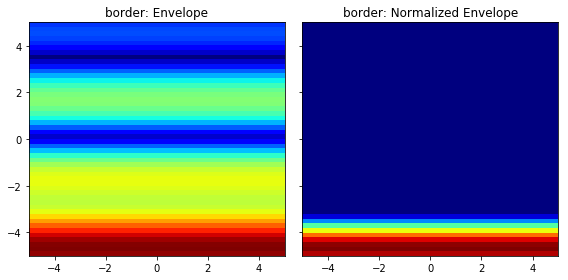

In [26]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
axs[0].imshow(out_env, aspect='auto', cmap='jet', extent=(-size, size, -size, size))
axs[0].set_title(border_cell.cell_type + ': Envelope')
axs[1].imshow(out_norm, aspect='auto', cmap='jet', extent=(-size, size, -size, size))
axs[1].set_title(border_cell.cell_type + ': Normalized Envelope')
plt.tight_layout()

In [27]:
from vco import *

In [30]:
out_norm, out_env = vco.matrix_sum(lborder_cell.mat, lborder_cell.weights, size)

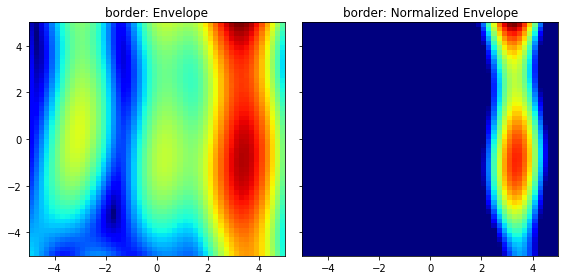

In [31]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
axs[0].imshow(out_env, aspect='auto', cmap='jet', extent=(-size, size, -size, size))
axs[0].set_title(border_cell.cell_type + ': Envelope')
axs[1].imshow(out_norm, aspect='auto', cmap='jet', extent=(-size, size, -size, size))
axs[1].set_title(border_cell.cell_type + ': Normalized Envelope')
plt.tight_layout()

In [32]:
lborder_cell.show_plot(5)

In [33]:
lborder_cell.show_plot(5)